In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f2 = pd.read_csv("CH_2021.csv")

In [3]:
f2

,Date,CH
0,2021-03-26,0.000000
1,2021-03-27,0.000667
2,2021-03-28,0.001333
3,2021-03-29,0.002000
4,2021-03-30,0.002667
...,...,...
111,2021-07-15,0.690000
112,2021-07-16,0.700000
113,2021-07-17,0.710000
114,2021-07-18,0.720000


In [4]:
f2['Date'] = pd.to_datetime(f2['Date'])

In [5]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [6]:
data2 = f2

In [7]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [8]:
data2.drop(['Date'], axis = 1,inplace = True)

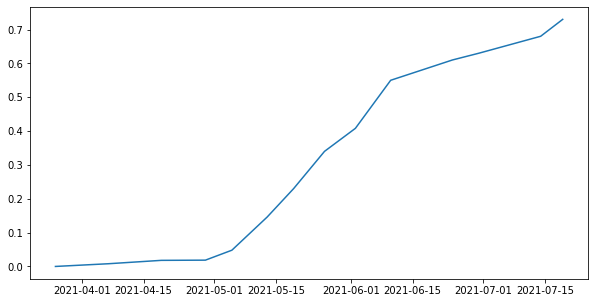

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['CH'])

In [10]:
ad_fuller_result = adfuller(data2['CH'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.3212703695778869
p-value: 0.9224373201170837


In [12]:
data2['CH_diff'] = data2['CH'].diff()

In [13]:
ad_fuller_result = adfuller(data2['CH_diff'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.841482601821047
p-value: 0.36006976507279265


In [15]:
data2['CH_diff2'] = data2['CH_diff'].diff()

In [16]:
ad_fuller_result = adfuller(data2['CH_diff2'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.555605878563211
p-value: 7.967340348898418e-19


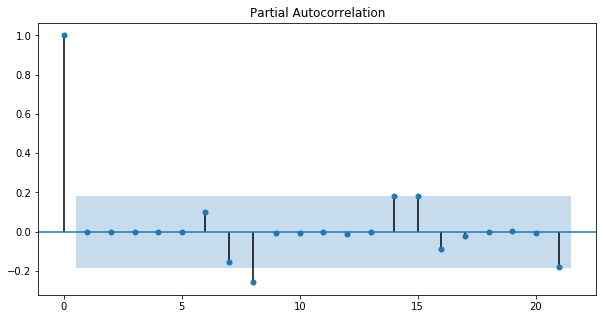

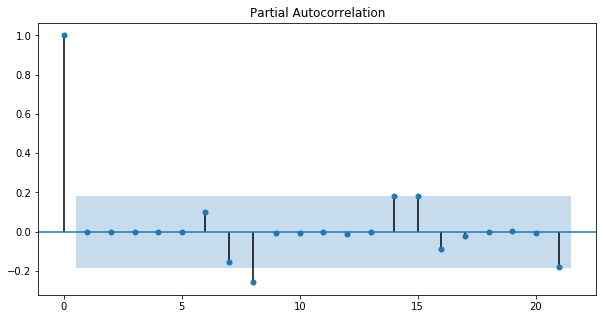

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(data2['CH_diff2'].dropna())

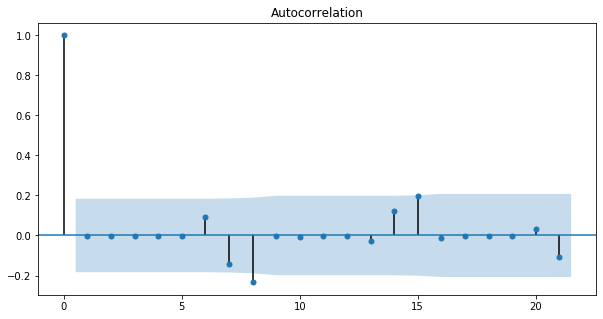

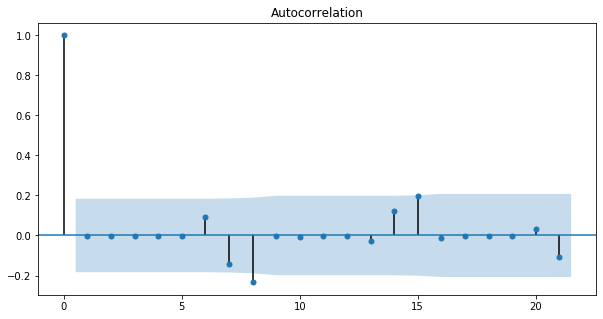

In [18]:
plot_acf(data2['CH_diff2'].dropna())

In [19]:
train_data = data2[:80]

In [21]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['CH'], order = (1,2,1))
model_fit = model.fit()

C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [22]:
model_pred = model_fit.forecast(steps = 20)
model_pred

2021-06-14    0.567143
2021-06-15    0.571429
2021-06-16    0.575714
2021-06-17    0.580000
2021-06-18    0.584286
2021-06-19    0.588571
2021-06-20    0.592857
2021-06-21    0.597143
2021-06-22    0.601429
2021-06-23    0.605714
2021-06-24    0.610000
2021-06-25    0.614286
2021-06-26    0.618571
2021-06-27    0.622857
2021-06-28    0.627143
2021-06-29    0.631429
2021-06-30    0.635714
2021-07-01    0.640000
2021-07-02    0.644286
2021-07-03    0.648571
Freq: D, dtype: float64

(array([737956., 737958., 737960., 737962., 737964., 737966., 737968.,
        737970., 737972., 737974.]),
 <a list of 10 Text xticklabel objects>)

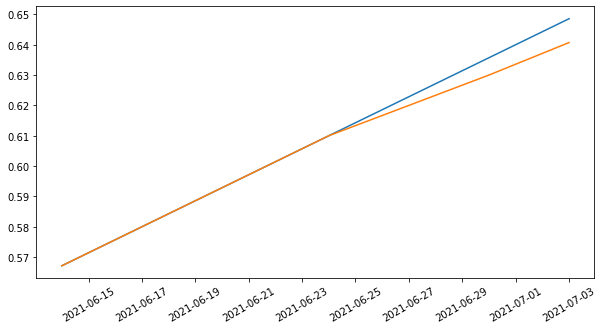

In [26]:
plt.plot(model_pred)
plt.plot(data2[80:100]['CH'])
plt.xticks(rotation = 30)